<a href="https://colab.research.google.com/github/GuilhermeDumam/Desafio_Conta_Azul/blob/Master/desafio_conta_azul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTAÇÃO BIBLIOTECAS e DATASET**

##Base de dados (raw)

https://docs.google.com/spreadsheets/d/1qU9oeYgrrpXGAiqiB9jZ_uQgoXxEuRLVU9iPj83UTkw/edit?usp=sharing

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [170]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly           
import pandas as pd
import numpy as np
import random

In [2]:
from pandas_profiling import ProfileReport

In [3]:
from scipy import stats

In [268]:
df = pd.read_csv(('/content/customer_churn_data1.csv'), sep=';',decimal=',')

#**Tratamento**

In [269]:
df.head()

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,Frequência de utilização de feature do sistema: Emissão de nota fiscal,Frequência de utilização de feature do sistema: Integração bancária,Frequência de utilização de feature do sistema: Módulo de vendas,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,29.85,29.85,Não
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,Pouco uso,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Trimestral,0,No,Boleto - mês a mês,56.95,1889.50,Não
2,3,Pequena empresa,2021,Não,até 5 funcionários,2,Sim,Não,automática,Uso frequente,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - mês a mês,53.85,108.15,Sim
3,4,Pequena empresa,2016,Não,até 5 funcionários,45,Não,NaN,automática,Uso frequente,Pouco uso,Uso frequente,Uso frequente,Pouco uso,Pouco uso,Trimestral,0,No,Cartão de crédito - pagamento único,42.30,1840.75,Não
4,5,Micro empresa,2017,Não,até 5 funcionários,2,Sim,Não,manual,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,70.70,151.65,Sim


In [ ]:
df.columns

In [270]:
columns_renamed = {
    'Tipo de empresa': 'tipo_de_empresa', 
    'Tipo de empresa': 'tipo_de_empresa', 
    'Fundação da empresa': 'fundacao_da_empresa', 
    'Possui mais de um sócio': 'possui_mais_de_um_socio', 
    'Funcionários': 'funcionarios',
    'Meses de permanência ': 'meses_de_permanencia', 
    'Utiliza serviços financeiros': 'utiliza_servicos_financeiros',
    'PossuiContador': 'possui_contador', 
    'Faz conciliação bancária': 'faz_conciliacao_bancaria', 
    'Frequência de utilização de feature do sistema: Módulo financeiro': 'frequencia_de_utilizacao_modulo_financeiro', 
    'Frequência de utilização de feature do sistema: Emissão de nota fiscal': 'frequencia_de_utilizacao_sistema_emissao_de_nota_fiscal',
    'Frequência de utilização de feature do sistema: Integração bancária': 'frequencia_de_utilizacao_integracao_bancaria',
    'Frequência de utilização de feature do sistema: Módulo de vendas': 'frequencia_de_utilizacao_modulo_de_vendas',
    'Frequência de utilização de feature do sistema: Relatórios': 'frequencia_de_utilizacao_sistema_relatorios',
    'Frequência de utilização de feature do sistema: Utilização de APIs de integração': 'frequencia_de_utilizacao_sistema_de_apis_de_integracao',
    'Contrato': 'contrato',
    'Emite boletos': 'emite_boletos',
    'Emite boletos.1': 'emite_boletos_1',
    'Tipo de pagamento': 'tipo_de_pagamento',
    'Receita mensal': 'receita_mensal',
    'Receita total': 'receita_total',
    'Churn': 'churn'
}
df.rename(columns=columns_renamed, inplace=True)

In [ ]:
df.info()
df.shape

In [ ]:
df[df.duplicated()].count()

In [282]:
#Excluir valores duplicados caso haja valores duplicados
df.drop_duplicates(inplace = True)

In [ ]:
df.isna().sum()/df.shape[0]

In [271]:
df['possui_contador'].fillna(df['possui_contador'].mode()[0], inplace=True)

In [272]:
df['receita_total'].fillna(df['receita_mensal'], inplace=True)

In [273]:
df.drop(columns=['ID'], inplace=True)

In [274]:
df.drop(columns = ['emite_boletos_1'], inplace = True)

In [275]:
df.loc[df.churn == 'Não', 'churn'] = 0
df.loc[df.churn == 'Sim', 'churn'] = 1

In [276]:
df['churn'] = df['churn'].astype(int)

In [277]:
df.loc[df.possui_mais_de_um_socio == 'Não', 'possui_mais_de_um_socio'] = 0
df.loc[df.possui_mais_de_um_socio == 'Sim', 'possui_mais_de_um_socio'] = 1

In [278]:
df['possui_mais_de_um_socio'] = df['possui_mais_de_um_socio'].astype(int)

In [279]:
df.loc[df.utiliza_servicos_financeiros == 'Não', 'utiliza_servicos_financeiros'] = 0
df.loc[df.utiliza_servicos_financeiros == 'Sim', 'utiliza_servicos_financeiros'] = 1

In [280]:
df['utiliza_servicos_financeiros'] = df['utiliza_servicos_financeiros'].astype(int)

In [281]:
df.loc[df.possui_contador == 'Não', 'possui_contador'] = 0
df.loc[df.possui_contador == 'Não ', 'possui_contador'] = 0
df.loc[df.possui_contador == 'Sim', 'possui_contador'] = 1

In [282]:
df['possui_contador'] = df['possui_contador'].astype(int)

In [283]:
df.loc[df.possui_mais_de_um_socio == 'Não', 'possui_mais_de_um_socio'] = 0
df.loc[df.possui_mais_de_um_socio == 'Sim', 'possui_mais_de_um_socio'] = 1

In [284]:
df['possui_mais_de_um_socio'] = df['possui_mais_de_um_socio'].astype(int)

In [285]:
df.loc[df.tipo_de_empresa == 'Micro empresa', 'tipo_de_empresa'] = 0
df.loc[df.tipo_de_empresa == 'Pequena empresa', 'tipo_de_empresa'] = 1

In [286]:
df['tipo_de_empresa'] = df['tipo_de_empresa'].astype(int)

In [287]:
df.loc[df.funcionarios == 'até 5 funcionários', 'funcionarios'] = 0
df.loc[df.funcionarios == '6 ou mais funcionários', 'funcionarios'] = 1

In [288]:
df['funcionarios'] = df['funcionarios'].astype(int)

#**EDA**

In [ ]:
df.describe()

In [ ]:
df.head()

In [320]:
profile = ProfileReport(
    df, title='Profile_EDA', html={'style': {'full_width': True}}, sort=None)

In [ ]:
profile.to_notebook_iframe()

## Avaliação de Distribuições e Densidade


In [171]:
df['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

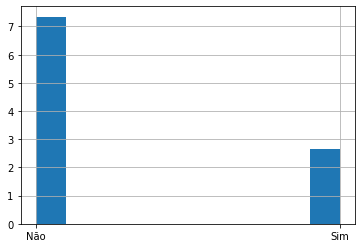

In [191]:
df.churn.hist(density = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Distribuição do Churn')

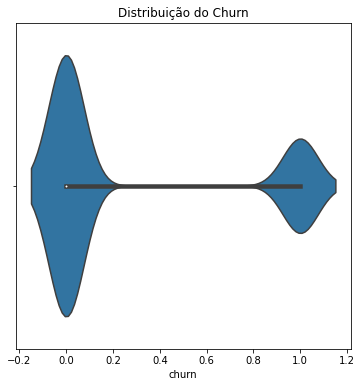

In [362]:
plt.figure(figsize = (6,6))
sns.violinplot(df.churn)
plt.title('Distribuição do Churn')

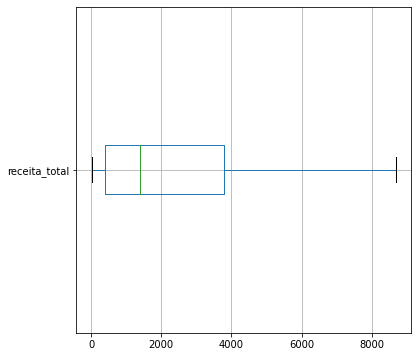

In [361]:
plt.figure(figsize =(6,6))
df.boxplot('receita_total',vert=False)

Text(0.5, 1.0, 'Distribuição Receita Total')

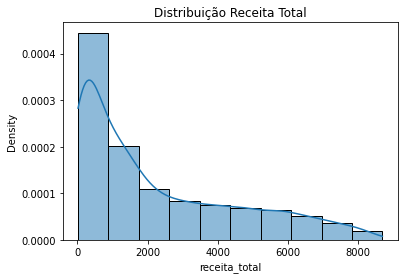

In [49]:
sns.histplot(data=df, x="receita_total", bins=10,  stat="density", kde=True)
plt.title('Distribuição Receita Total')

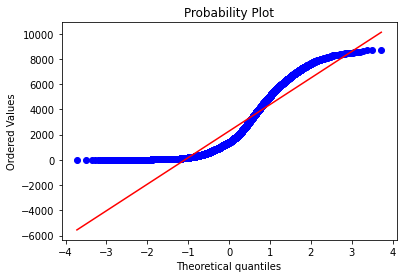

In [54]:
res = stats.probplot(df['receita_total'], plot = plt)

In [368]:
numeric_var = ['fundacao_da_empresa', 'meses_de_permanencia', 'receita_mensal', 'receita_total']

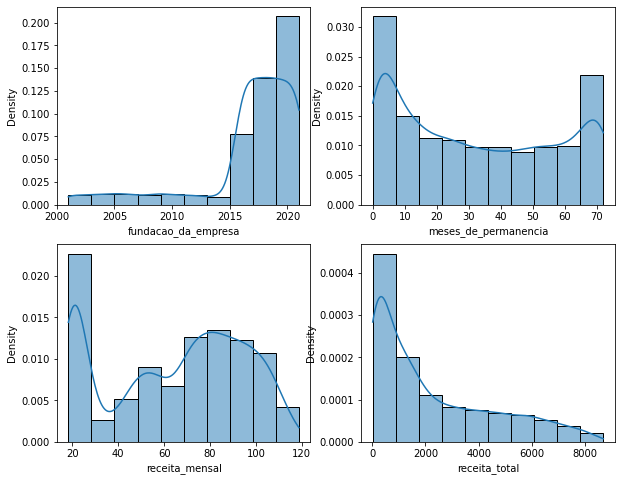

In [370]:
# Olhando a distribuição para todas as variaveis
n_rows=2
n_cols=2
# Create the subplots
fig, axes = plt.subplots(nrows = n_rows, ncols=n_cols)
fig.set_size_inches(10, 8)

for i, (ax, column) in enumerate(zip(axes.flatten(), numeric_var)):
  sns.histplot(df[column], ax=axes[i//n_cols][i%n_cols], bins=10, stat="density", kde=True) 

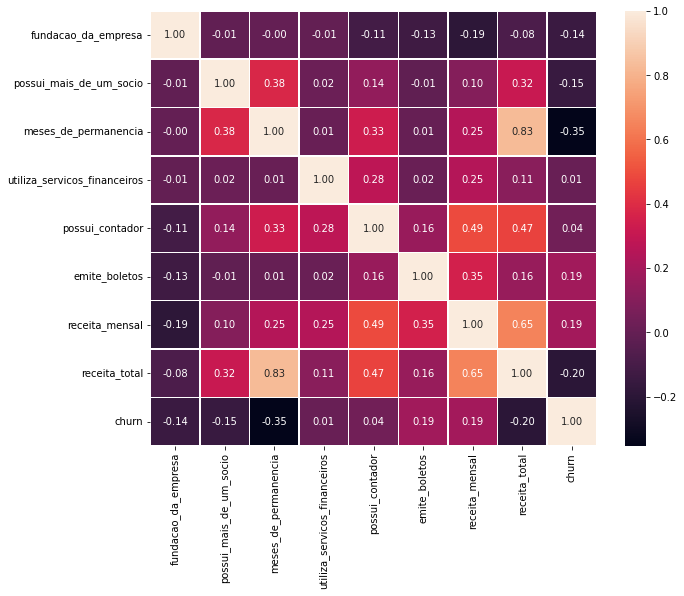

In [372]:
#Todas variáveis
corr_var = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(data = corr_var, linewidths=.5, annot=True,  fmt=".2f")

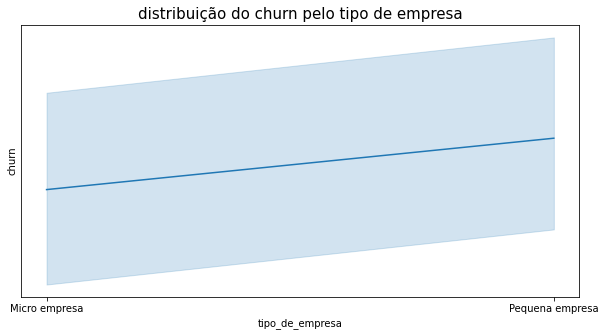

In [338]:
plt.figure(figsize=(10,5))
plt.title("distribuição do churn pelo tipo de empresa", fontsize=15)
lines = ['churn']
for line in lines:
    ax = sns.lineplot(x='tipo_de_empresa', y=line, data=df)

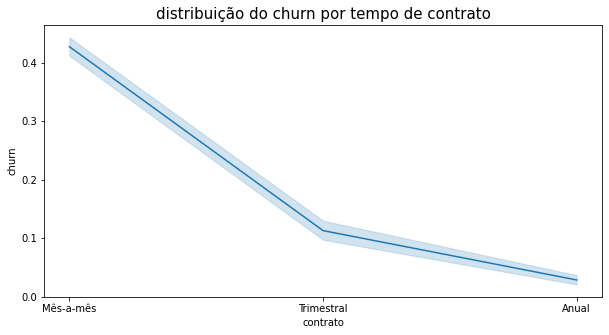

In [366]:
plt.figure(figsize=(10,5))
plt.title("distribuição do churn por tempo de contrato", fontsize=15)
lines = ['churn']
for line in lines:
    ax = sns.lineplot(x='contrato', y=line, data=df)

In [331]:
media_por_ano = df[['fundacao_da_empresa', 'meses_de_permanencia', 'receita_mensal', 'receita_total']].groupby('fundacao_da_empresa').mean().sort_values(by='fundacao_da_empresa').reset_index()
media_por_ano.head()

,fundacao_da_empresa,meses_de_permanencia,receita_mensal,receita_total
0,2001,32.211765,75.657647,2557.699412
1,2002,29.057143,83.636429,2665.356429
2,2003,28.050633,77.804430,2360.703165
3,2004,34.537500,74.618750,2638.096250
4,2005,35.045977,82.882184,3017.472414


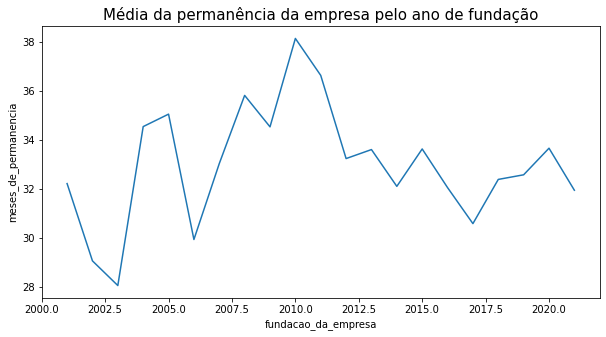

In [367]:
plt.figure(figsize=(10,5))
plt.title("Média da permanência da empresa pelo ano de fundação", fontsize=15)
lines = ['meses_de_permanencia']
for line in lines:
    ax = sns.lineplot(x='fundacao_da_empresa', y=line, data=media_por_ano)

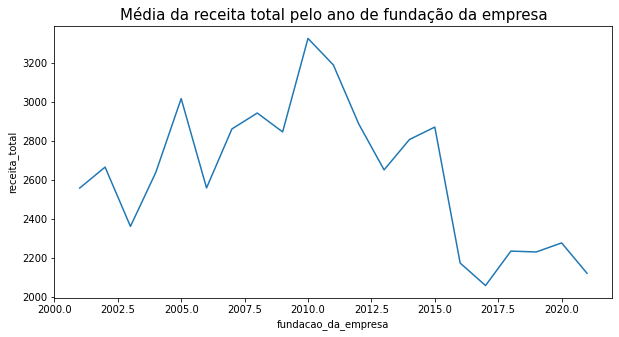

In [374]:
plt.figure(figsize=(10,5))
plt.title("Média da receita total pelo ano de fundação da empresa", fontsize=15)
lines = ['receita_total']
for line in lines:
    ax = sns.lineplot(x='fundacao_da_empresa', y=line, data=media_por_ano)

In [64]:
#Teste T para saber se alguns parâmetros influenciam realmente no Churn
import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

####H0: Não há diferença entre as médias
####H1: Há diferença

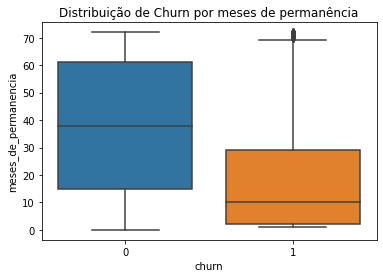

In [65]:
sns.boxplot(x=df.churn, y=df.meses_de_permanencia)
plt.title('Distribuição de Churn por meses de permanência')
plt.show()

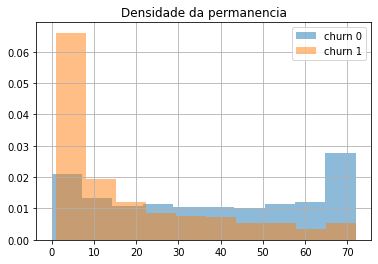

In [376]:
df[df.churn==0]['meses_de_permanencia'].hist(density=True, alpha=0.5)
df[df.churn==1]['meses_de_permanencia'].hist(density=True, alpha=0.5)
plt.legend(['churn 0', 'churn 1'])
plt.title('Densidade da permanencia')
plt.show()

In [69]:
stats.ttest_ind(df[df.churn==0]['meses_de_permanencia'], df[df.churn==1]['meses_de_permanencia'])

Ttest_indResult(statistic=31.569995452928403, pvalue=1.0732933837402176e-204)

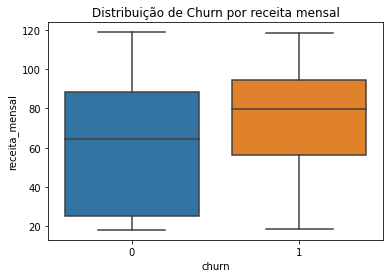

In [70]:
sns.boxplot(x=df.churn, y=df.receita_mensal)
plt.title('Distribuição de Churn por receita mensal')
plt.show()

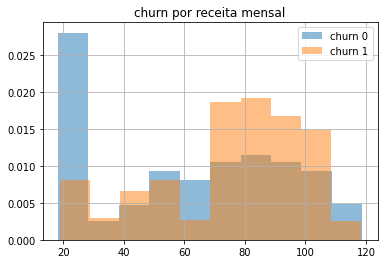

In [375]:
df[df['churn']==0]['receita_mensal'].hist(density=True, alpha=0.5)
df[df['churn']==1]['receita_mensal'].hist(density=True, alpha=0.5)
plt.legend(['churn 0', 'churn 1'])
plt.title('churn por receita mensal')
plt.show()

In [43]:
stats.ttest_ind(df[df.churn==0]['receita_mensal'], df[df.churn==1]['receita_mensal'])

Ttest_indResult(statistic=-16.55017772823186, pvalue=2.189014556607605e-60)

#**Feature Engineering**

####Tratamento de outliers e 'feature scaling' das variáveis contínuas.

In [72]:
## Remoção Outlier por IQR
def iqr_remove(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  return df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [211]:
df.shape

(7036, 20)

In [213]:
iqr_remove(df,'receita_total').shape

(7036, 20)

In [214]:
iqr_remove(df,'meses_de_permanencia').shape

(7036, 20)

In [215]:
iqr_remove(df,'receita_mensal').shape

(7036, 20)

In [ ]:
print(df.skew())

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [28]:
z_score = StandardScaler()
min_max = MinMaxScaler()
robust = RobustScaler()

In [389]:
df_features = df

In [390]:
df_features.meses_de_permanencia = min_max.fit_transform(df[['meses_de_permanencia']])

In [391]:
df_features.receita_mensal = min_max.fit_transform(df[['receita_mensal']])

In [392]:
df_features.receita_total = min_max.fit_transform(df[['receita_total']])

In [ ]:
df_features.head()

####Transformação das variáveis categóricas

######ONE HOT enconding:
Transformar variáveis categóricas com respostas binárias em variáveis contínuas.

In [ ]:
!pip install category_encoders

In [245]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

In [348]:
one_hot = OneHotEncoder()

In [388]:
# temp_tipo_empresa = pd.DataFrame(one_hot.fit_transform(df_features[['tipo_de_empresa']]).toarray(),columns=one_hot.get_feature_names_out(['tipo_de_empresa']))
# df_features = df_features.drop(columns='tipo_de_empresa').join(temp_tipo_empresa)

In [372]:
# temp_funcionarios = pd.DataFrame(one_hot.fit_transform(df_features[['funcionarios']]).toarray(),columns=one_hot.get_feature_names_out(['funcionarios']))
# df_features = df_features.drop(columns='funcionarios').join(temp_funcionarios)

In [373]:
# temp_socio = pd.DataFrame(one_hot.fit_transform(df_features[['possui_mais_de_um_socio']]).toarray(),columns=one_hot.get_feature_names_out(['possui_mais_de_um_socio']))
# df_features = df_features.drop(columns='possui_mais_de_um_socio').join(temp_socio)

In [374]:
# temp_servicosfinanceiros = pd.DataFrame(one_hot.fit_transform(df_features[['utiliza_servicos_financeiros']]).toarray(),columns=one_hot.get_feature_names_out(['utiliza_servicos_financeiros']))
# df_features = df_features.drop(columns='utiliza_servicos_financeiros').join(temp_servicosfinanceiros)

In [375]:
# temp_contador = pd.DataFrame(one_hot.fit_transform(df_features[['possui_contador']]).toarray(),columns=one_hot.get_feature_names_out(['possui_contador']))
# df_features = df_features.drop(columns='possui_contador').join(temp_contador)

In [376]:
# temp_boleto = pd.DataFrame(one_hot.fit_transform(df_features[['emite_boletos']]).toarray(),columns=one_hot.get_feature_names_out(['emite_boletos']))
# df_features = df_features.drop(columns='emite_boletos').join(temp_boleto)

In [ ]:
df_features.head()

######Target enconding:
Transformar a variável categórica numérica a partir de uma relação do valor com a variável 'target'(churn), em variável contínua.

In [393]:
ta_encoder = TargetEncoder(cols='fundacao_da_empresa')
df_features['fundacao_da_empresa'] = ta_encoder.fit_transform(df_features['fundacao_da_empresa'], df[['churn']])

In [357]:
# ta_encoder1 = TargetEncoder(cols='churn')
# df_features['churn'] = ta_encoder1.fit_transform(df_features[['churn']], df[['churn']])

In [ ]:
df_features.head()

######Ordinal enconding:

Enumera os valores categóricos (por palavra) a partir de 0

In [394]:
enc = OrdinalEncoder()
df_features[['faz_conciliacao_bancaria','frequencia_de_utilizacao_modulo_financeiro','frequencia_de_utilizacao_sistema_emissao_de_nota_fiscal',
'frequencia_de_utilizacao_integracao_bancaria','frequencia_de_utilizacao_modulo_de_vendas','frequencia_de_utilizacao_sistema_relatorios','frequencia_de_utilizacao_sistema_de_apis_de_integracao','contrato','tipo_de_pagamento']] = enc.fit_transform(df_features[['faz_conciliacao_bancaria','frequencia_de_utilizacao_modulo_financeiro','frequencia_de_utilizacao_sistema_emissao_de_nota_fiscal',
'frequencia_de_utilizacao_integracao_bancaria','frequencia_de_utilizacao_modulo_de_vendas','frequencia_de_utilizacao_sistema_relatorios','frequencia_de_utilizacao_sistema_de_apis_de_integracao','contrato','tipo_de_pagamento']])

In [ ]:
df_features.head()

##Árvore de decisão

Uma árvore de decisão é uma ferramenta de suporte à tomada de decisão que usa um gráfico no formato de árvore e demonstra visualmente as condições e as probabilidades para se chegar a resultados. Este é um método de aprendizado de máquina supervisionado.

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN

from collections import Counter
from sklearn import metrics


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [255]:
def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_resample(X, y)
    counter = Counter(y_res)
    print("Resample: ", counter)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

In [256]:
def calculate_metrics(X, y, clf):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_validate(clf, X, y, scoring=['roc_auc','f1_macro','accuracy', 'recall','precision'], cv=cv, n_jobs=-1)
    print(f"Accuracy: {np.mean(scores['test_accuracy']):.3f}")
    print(f"Precision: {np.mean(scores['test_precision']):.3f}")
    print(f"Recall: {np.mean(scores['test_recall']):.3f}")
    print(f"F1 Score: {np.mean(scores['test_f1_macro']):.3f}")
    print(f"AUC {np.mean(scores['test_roc_auc']):.3f}")

In [257]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

#####Selecionando as features para o modelo:

Utilizaremos o 'Recursive feature elimination' para rankear quais as melhores features para nós utilizarmos na nossa árvore de decisões de classificação. 

In [404]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_classif

In [425]:
target = df_features['churn']

In [ ]:
dfx = df_features.drop('churn', axis = 1)

In [ ]:
x1 = dfx
y1 = target

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=1)

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=1)

dt.fit(x1_train, y1_train)

In [424]:
rfe = RFE(estimator=dt, step=1)
rfe = rfe.fit(x1_train, y1_train)

In [418]:
selected_rfe_features = pd.DataFrame({'Feature':list(x1_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
18,receita_total,1
1,fundacao_da_empresa,1
15,emite_boletos,1
4,meses_de_permanencia,1
14,contrato,1
7,faz_conciliacao_bancaria,1
8,frequencia_de_utilizacao_modulo_financeiro,1
17,receita_mensal,1
11,frequencia_de_utilizacao_modulo_de_vendas,1
16,tipo_de_pagamento,2


Pelo RFE ficou rankeado que as features mais importantes são:
'receita_total', 'fundacao_da_empresa', 'emite_boletos', 'meses_de_permanencia', 'contrato', 'faz_conciliacao_bancaria', 'requencia_de_utilizacao_modulo_financeiro', 'receita_mensal', 'frequencia_de_utilizacao_modulo_de_vendas'.